### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

---

In [1]:
%%capture

import json
import os

os.chdir("..")

from dotenv import load_dotenv

load_dotenv()

from IPython.display import Markdown, display

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# graph rendering
import nest_asyncio

nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])


---
### XAI ReACT RAG Agent

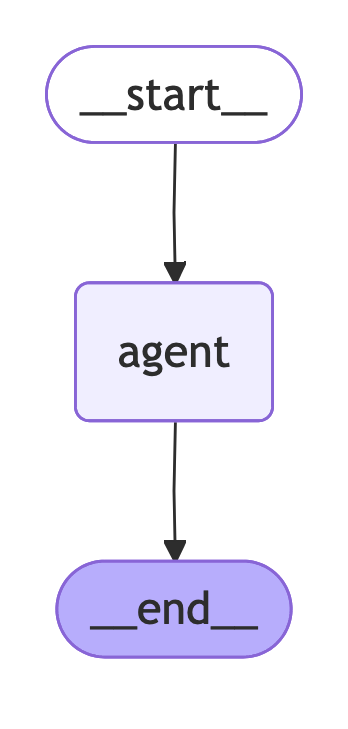

In [2]:
# Create Workflow

xai_agent = experiment_utils.create_xai_agent(
    agent_type="adaptive_rag", llm_tag="grok-code-fast", api_key=os.getenv("XAI_API_KEY")
)
xai_agent_config = {
    "configurable": {
        "thread_id": xai_agent["id"],
    },
    "recursion_limit": 30,
}
xai_react_rag_agent = container.react_rag_agent()
xai_workflow = xai_react_rag_agent.get_workflow(xai_agent["id"],schema="public")

experiment_utils.print_graph(xai_workflow)

In [3]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [4]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Based on the provided context from *The Art of War* by Sun Tzu, the pinnacle of excellence in warfare and leadership is achieving victory without fighting—breaking the enemy's resistance through superior strategy, secret planning, and adherence to moral law, discipline, and precise calculations (measurement, estimation, balancing chances). This involves embodying virtues like wisdom, sincerity, benevolence, courage, and strictness to ensure a flawless position where defeat is impossible and the enemy is conquered effortlessly, often unseen by the masses. It's not mere conquest, but a thunderbolt-like mastery that outwits without bloodshed.

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [6]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

### Vorige vraag:
Wat is het toppunt van uitmuntendheid?

### Mijn vorige antwoord:
Gebaseerd op de verstrekte context uit *De Kunst van het Oorlogvoeren* van Sun Tzu, is het toppunt van uitmuntendheid in oorlogvoering en leiderschap het bereiken van overwinning zonder te vechten. Dit gebeurt door de weerstand van de vijand te breken via superieure strategie, geheime planning, en naleving van de morele wet, discipline, en nauwkeurige berekeningen zoals meting, schatting en balanceren van kansen. Het omvat het belichamen van deugden zoals wijsheid, oprechtheid, welwillendheid, moed en strengheid. Dit verzekert een foutloze positie waarin nederlaag onmogelijk is en de vijand moeiteloos wordt overwonnen. Vaak blijft deze overwinning ongezien door de massa's. Het gaat niet om louter verovering, maar om een bliksemachtige beheersing die zonder bloedvergieten overtroeft. Dit benadrukt dat ware uitmuntendheid ligt in slimheid en morele kracht, niet in brute kracht.

---
### Anthropic ReACT RAG Agent

In [7]:
# Create Workflow

anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="adaptive_rag", llm_tag="claude-sonnet-4-20250514", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_agent_config = {
    "configurable": {
        "thread_id": anthropic_agent["id"],
    },
    "recursion_limit": 30,
}
anthropic_react_rag_agent = container.react_rag_agent()
anthropic_workflow = anthropic_react_rag_agent.get_workflow(anthropic_agent["id"],schema="public")

In [8]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [9]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Based on the context provided, the pinnacle of excellence is **achieving victory without fighting**. 

According to this ancient strategic wisdom, supreme excellence consists in "breaking the enemy's resistance without fighting" rather than winning through battle. The highest form of skill involves:

- Planning secretly and moving strategically
- Disrupting the enemy's plans and schemes
- Winning "without shedding a drop of blood"
- Making defeat impossible through careful positioning and preparation

True excellence is described as accomplishing what "the world's coarse thumb and finger fail to plumb" - achieving results that go beyond what ordinary observers can appreciate or understand. It's about complete victory through superior strategy, wisdom, and preparation rather than through direct confrontation.

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

**Mijn vorige vraag:** "What is the pinnacle of excellence?"

**Mijn antwoord in het Nederlands:**

Het hoogtepunt van excellentie is **overwinning behalen zonder te vechten**. Volgens deze oude strategische wijsheid bestaat opperste excellentie uit "de weerstand van de vijand breken zonder te vechten" in plaats van winnen door gevecht. De hoogste vorm van vaardigheid omvat geheim plannen en strategisch bewegen. Het gaat om het verstoren van vijandelijke plannen en schema's. Winnen "zonder een druppel bloed te vergieten" is het doel. Ware excellentie betekent het bereiken van wat gewone waarnemers niet kunnen begrijpen of waarderen. Het draait om complete overwinning door superieure strategie, wijsheid en voorbereiding. Dit is belangrijker dan directe confrontatie. Nederlaag onmogelijk maken door zorgvuldige positionering en voorbereiding is essentieel.

---
### Ollama ReACT RAG Agent

In [14]:
# Create Workflow

ollama_agent = experiment_utils.create_ollama_agent(
    agent_type="adaptive_rag", llm_tag="gpt-oss:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT"),
)
ollama_agent_config = {
    "configurable": {
        "thread_id": ollama_agent["id"],
    },
    "recursion_limit": 30,
}
ollama_react_rag_agent = container.react_rag_agent()
ollama_workflow = ollama_react_rag_agent.get_workflow(ollama_agent["id"],schema="public")

In [15]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [16]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

The pinnacle of excellence is to win without fighting – to break the enemy’s resistance by out‑maneuvering and out‑planning them, so that victory comes without bloodshed.

In [17]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [18]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

**Vraag:** Wat is het toppunt van uitmuntendheid?  

**Antwoord:** Het toppunt van uitmuntendheid is om te winnen zonder te vechten – door de vijandelijke weerstand te breken via slimme manoeuvres en planning, zodat de overwinning zonder bloedvergieten komt.

---
### OpenAI ReACT RAG Agent

In [19]:
# Create Workflow

openai_agent = experiment_utils.create_openai_agent(
    agent_type="adaptive_rag", llm_tag="gpt-5-nano", api_key=os.getenv("OPENAI_API_KEY")
)
openai_agent_config = {
    "configurable": {
        "thread_id": openai_agent["id"],
    },
    "recursion_limit": 30,
}
openai_react_rag_agent = container.react_rag_agent()
openai_workflow = openai_react_rag_agent.get_workflow(openai_agent["id"],schema="public")

In [20]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [21]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Supreme excellence is breaking the enemy’s resistance without fighting (i.e., winning without bloodshed).

In [22]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [23]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Vraag: Wat is het toppunt van uitmuntendheid?
Antwoord: Het toppunt van uitmuntendheid is het breken van de weerstand van de vijand zonder te vechten (oftewel winnen zonder bloedvergieten).